In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [4]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


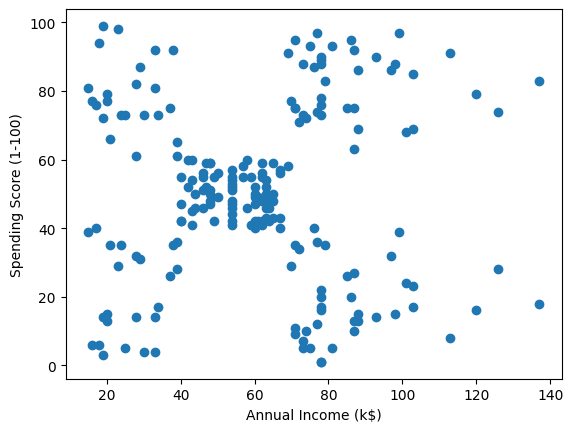

In [9]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x21eb93e6cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x21eb93e5120>,
 'boxes': [<matplotlib.lines.Line2D at 0x21eb93e61a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21eb93e4be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21eb93e5b70>],
 'means': []}

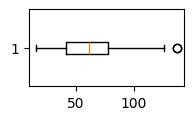

In [14]:
plt.figure(figsize =(2,1))
plt.boxplot(df["Annual Income (k$)"],vert= False)

In [18]:
sorted(df["Annual Income (k$)"],reverse=True)

[137,
 137,
 126,
 126,
 120,
 120,
 113,
 113,
 103,
 103,
 103,
 103,
 101,
 101,
 99,
 99,
 98,
 98,
 97,
 97,
 93,
 93,
 88,
 88,
 88,
 88,
 87,
 87,
 87,
 87,
 87,
 87,
 86,
 86,
 85,
 85,
 81,
 81,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 76,
 76,
 75,
 75,
 74,
 74,
 73,
 73,
 73,
 73,
 72,
 72,
 71,
 71,
 71,
 71,
 71,
 71,
 70,
 70,
 69,
 69,
 67,
 67,
 67,
 67,
 65,
 65,
 65,
 65,
 64,
 64,
 63,
 63,
 63,
 63,
 63,
 63,
 62,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 60,
 60,
 60,
 60,
 60,
 60,
 59,
 59,
 58,
 58,
 57,
 57,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 54,
 50,
 50,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 46,
 46,
 46,
 46,
 44,
 44,
 43,
 43,
 43,
 43,
 42,
 42,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 38,
 38,
 37,
 37,
 34,
 34,
 33,
 33,
 33,
 33,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 28,
 25,
 25,
 24,
 24,
 23,
 23,
 21,
 21,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 17,
 17,
 16,
 

{'whiskers': [<matplotlib.lines.Line2D at 0x21ebcf67af0>,
 'caps': [<matplotlib.lines.Line2D at 0x21ebd6f0070>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ebcf67850>],
 'medians': [<matplotlib.lines.Line2D at 0x21ebd6f05b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ebd6f0850>],
 'means': []}

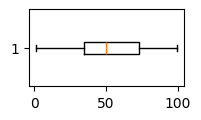

In [15]:
plt.figure(figsize =(2,1))
plt.boxplot(df["Spending Score (1-100)"],vert= False)

In [21]:
mask = df["Annual Income (k$)"] < 137
new_df = df[mask]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              198 non-null    int64
 1   Annual Income (k$)      198 non-null    int64
 2   Spending Score (1-100)  198 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [20]:
from sklearn.cluster import KMeans

In [22]:
X = new_df.iloc[:,1:].values
X.shape

(198, 2)

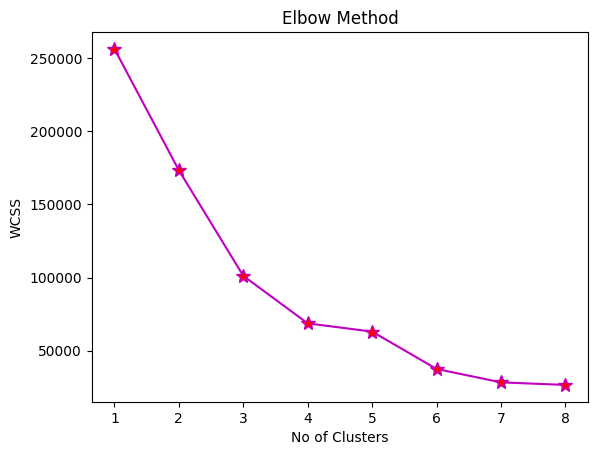

In [32]:
wcss=[]
for i in range(1,9):
    model = KMeans(n_clusters =i)
    model.fit(X)
    wcss.append(model.inertia_)
    
plt.plot(range(1,9),wcss,marker = "*",mfc="r", c= "m", ms=10)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

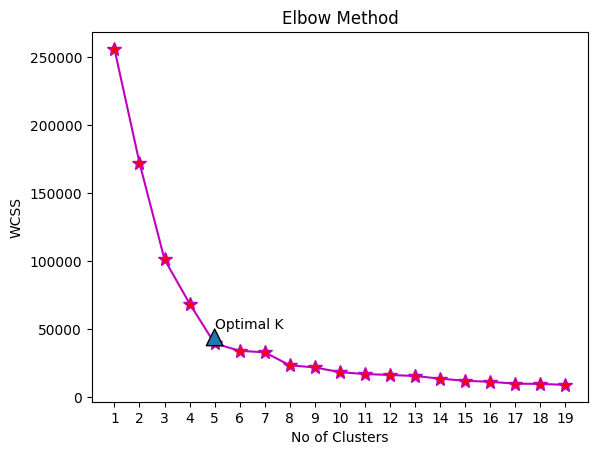

In [35]:
wcss=[]
for i in range(1,20):
    model = KMeans(n_clusters =i)
    model.fit(X)
    wcss.append(model.inertia_)
    
plt.plot(range(1,20),wcss,marker = "*",mfc="r", c= "m", ms=10)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,20))
plt.title("Elbow Method")
plt.annotate("Optimal K",xy=(5,50000),arrowprops=dict())
plt.show()

In [36]:
model = KMeans(n_clusters = 5)
model.fit(X)
y  = model.predict(X)

In [37]:
y

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

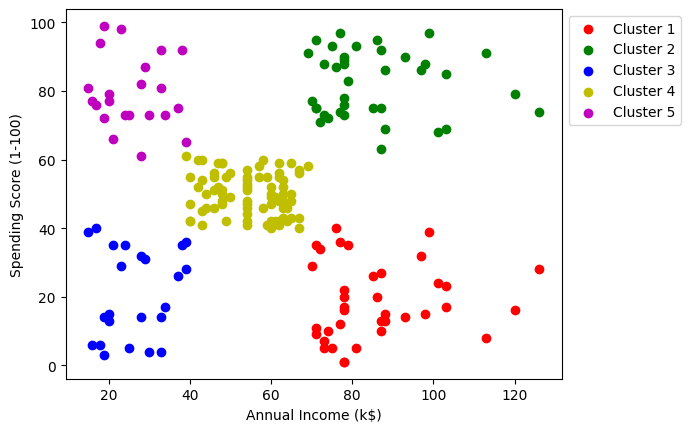

In [50]:
#plt.scatter(df.iloc[:,1],df.iloc[:,2])
plt.scatter(new_df.iloc[y==0,1],new_df.iloc[y==0,2],label = "Cluster 1", c ="r")
plt.scatter(new_df.iloc[y==1,1],new_df.iloc[y==1,2],label = "Cluster 2", c ="g")
plt.scatter(new_df.iloc[y==2,1],new_df.iloc[y==2,2],label = "Cluster 3", c ="b")
plt.scatter(new_df.iloc[y==3,1],new_df.iloc[y==3,2],label = "Cluster 4", c ="y")
plt.scatter(new_df.iloc[y==4,1],new_df.iloc[y==4,2],label = "Cluster 5", c ="m")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [51]:
model.cluster_centers_

array([[85.64864865, 18.64864865],
       [85.21052632, 82.10526316],
       [26.30434783, 20.91304348],
       [54.61538462, 50.02564103],
       [25.72727273, 79.36363636]])

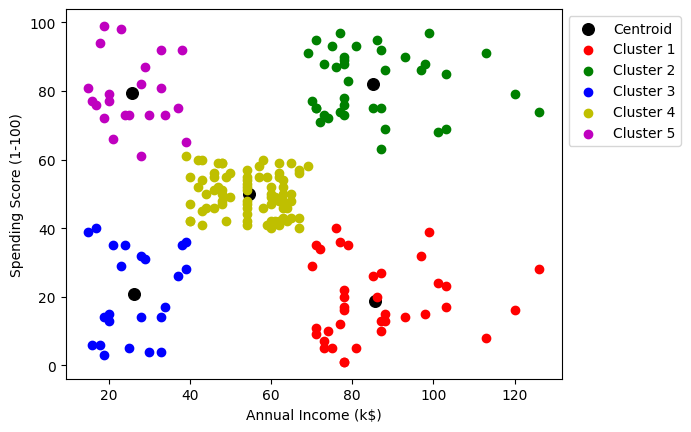

In [53]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c ='k',s=70,label ="Centroid")
plt.scatter(new_df.iloc[y==0,1],new_df.iloc[y==0,2],label = "Cluster 1", c ="r")
plt.scatter(new_df.iloc[y==1,1],new_df.iloc[y==1,2],label = "Cluster 2", c ="g")
plt.scatter(new_df.iloc[y==2,1],new_df.iloc[y==2,2],label = "Cluster 3", c ="b")
plt.scatter(new_df.iloc[y==3,1],new_df.iloc[y==3,2],label = "Cluster 4", c ="y")
plt.scatter(new_df.iloc[y==4,1],new_df.iloc[y==4,2],label = "Cluster 5", c ="m")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(bbox_to_anchor = (1,1))
plt.show()